In [1]:
import ROOT as rt
# import root_numpy as rtnp
import csv
import re
import sys
import collections
from collections import OrderedDict
import uproot
import awkward
import numpy as np
import time
import numba
from numba import jit
from matplotlib import pyplot as plt
sys.path.append('/storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/lib/')
from histo_utilities import create_TH1D, create_TH2D, std_color_list, make_ratio_plot

import CMS_lumi, tdrstyle
tdrstyle.setTDRStyle()
CMS_lumi.writeExtraText = 0

wH = 1
Z_MASS = 91.2

# donotdelete = []
print(sys.version)

Welcome to JupyROOT 6.18/02
3.6.8 (default, Aug  7 2019, 17:28:10) 
[GCC 4.8.5 20150623 (Red Hat 4.8.5-39)]


In [2]:
fpath_bkg =OrderedDict()
tree_bkg = OrderedDict()
tree_sig = OrderedDict()
fpath_sig =OrderedDict()
year = 2016
category = 0
version = '/v1/v14/'
if year == 2016:
    bkg_path = '/mnt/hadoop//store/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/V1p12/MC_Summer16/v4/v3/normalized/'
    bkg_path = '/mnt/hadoop//store/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/V1p16/MC_Summer16/v1/v5/normalized/'


    data_path = '/mnt/hadoop//store/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/V1p15/Data2016/'+version+'/normalized/'
    sig_path = '/mnt/hadoop/store/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/V1p12/MC_RunIIFall18/v4/v5/normalized/'
    lumi = (5.632467289 +2.572903489 +1.685313225 +3.988453305 +3.068943620 +3.527270568 +8.609721915) * 1000
    lumi = 35.92*1000
    print("lumi is "+str(round(lumi/1000,2))+" fb-1")
# fpath_bkg['signal'] = sig_path+"ggH_HToSSTobbbb_ms55_pl1000_RunIIFall18_1pb_weighted.root"
fpath_bkg['QCD'] = bkg_path+"QCD_HT50toInf_TuneCUETP8M1_13TeV-madgraphMLM-pythia8_1pb_weighted.root"
fpath_bkg['WJetsToLNu'] = bkg_path+"WJetsToLNu_TuneCUETP8M1_13TeV-amcatnloFXFX-pythia8_1pb_weighted.root"
fpath_bkg['WJetsToLNu'] = bkg_path+"WJetsToLNu_HT-70ToInf_TuneCUETP8M1_13TeV-madgraphMLM-pythia8_1pb_weighted.root"


# fpath_bkg['ZJetsToNuNu_HT-100To200'] = bkg_path+"ZJetsToNuNu_HT-100To200_13TeV-madgraph_1pb_weighted.root"
# fpath_bkg['ZJetsToNuNu_HT-200To400'] = bkg_path+"ZJetsToNuNu_HT-200To400_13TeV-madgraph_1pb_weighted.root"
# fpath_bkg['ZJetsToNuNu_HT-400To600'] = bkg_path+"ZJetsToNuNu_HT-400To600_13TeV-madgraph_1pb_weighted.root"
# fpath_bkg['ZJetsToNuNu_HT-600To800'] = bkg_path+"ZJetsToNuNu_HT-600To800_13TeV-madgraph_1pb_weighted.root"
# fpath_bkg['ZJetsToNuNu_HT-800To1200'] = bkg_path+"ZJetsToNuNu_HT-800To1200_13TeV-madgraph_1pb_weighted.root"
# fpath_bkg['ZJetsToNuNu_HT-1200To2500'] = bkg_path+"ZJetsToNuNu_HT-1200To2500_13TeV-madgraph_1pb_weighted.root"
# fpath_bkg['ZJetsToNuNu_HT-2500ToInf'] = bkg_path+'ZJetsToNuNu_HT-2500ToInf_13TeV-madgraph_1pb_weighted.root'

fpath_bkg['ZJetsToNuNu'] = bkg_path+'ZJetsToNuNu_HT-100ToInf_13TeV-madgraph_1pb_weighted.root'


fpath_bkg['TTJets'] = bkg_path +'TTJets_TuneCUETP8M1_13TeV-madgraphMLM-pythia8_1pb_weighted.root'
# fpath_bkg['TTJets_Dilept'] = bkg_path+'TTJets_DiLept_TuneCUETP8M1_13TeV-madgraphMLM-pythia8_1pb_weighted.root'
# fpath_bkg['TTJets_SingleLeptFromT'] = bkg_path+'TTJets_SingleLeptFromT_TuneCUETP8M1_13TeV-madgraphMLM-pythia8_1pb_weighted.root'
# fpath_bkg['TTJets_SingleLeptFromTbar'] = bkg_path+'TTJets_SingleLeptFromTbar_TuneCUETP8M1_13TeV-madgraphMLM-pythia8_1pb_weighted.root'
fpath_bkg['data'] = data_path+"Run2_displacedJetMuonNtupler_V1p15_Data2016_Run2016-HighMET-07Aug17_goodLumi.root"
    

lumi is 35.92 fb-1


In [3]:
for k,v in fpath_bkg.items():
    print (k, v)
#     tree[k] = rtnp.root2array(v)
    root_dir = uproot.open(v) 
    tree_bkg[k] = root_dir['MuonSystem']
    a = tree_bkg[k]["weight"].array()
    print (np.unique(a)*lumi)
    print(a.shape)

QCD /mnt/hadoop//store/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/V1p16/MC_Summer16/v1/v5/normalized/QCD_HT50toInf_TuneCUETP8M1_13TeV-madgraphMLM-pythia8_1pb_weighted.root
[2.6627561e-01 3.9268345e-01 4.1547527e+00 1.6316303e+01 5.9253651e+01
 2.5125835e+02 2.0651323e+03 1.4798002e+05 2.1360550e+06]
(306501,)
WJetsToLNu /mnt/hadoop//store/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/V1p16/MC_Summer16/v1/v5/normalized/WJetsToLNu_HT-70ToInf_TuneCUETP8M1_13TeV-madgraphMLM-pythia8_1pb_weighted.root
[3.9941263e-03 8.4049618e-03 3.0533168e-02 2.2970329e-01 6.2698293e-01
 8.6515671e-01 1.0422313e+00 5.6702118e+00]
(3496908,)
ZJetsToNuNu /mnt/hadoop//store/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/V1p16/MC_Summer16/v1/v5/normalized/ZJetsToNuNu_HT-100ToInf_13TeV-madgraph_1pb_weighted.root
[0.00075758 0.01960707 0.02401536 0.02480935 0.04806599 0.13858715
 0.51029485]
(6795056,)
TTJets /mnt/hadoop//store/group/phys_exotica/delayedjets/displacedJe

In [4]:
legend = {}
# legend['bbbb'] = 'Signal (m_{h} ,m_{x})=(125, 50) GeV, c#tau = 1 m'
legend['bbbb'] = 'Signal (m_{h} ,m_{x})=(125, 40) GeV, c#tau = 1 m'


legend['bbbb_mh2000_ctau1'] = 'Signal (m_{h} ,m_{x})=(2000, 975) GeV, c#tau = 1 m'
legend['bbbb_mh125_ctau10'] = 'Signal (m_{h} ,m_{x})=(125, 50) GeV, c#tau = 10 m'
legend['bbbb_mh2000_ctau10'] = 'Signal (m_{h} ,m_{x})=(2000, 975) GeV, c#tau = 10 m'
legend['QCD'] = 'QCD HT50toInf'
legend['DYJetsToLL'] = 'DYJetsToLL'
legend['TTJets'] = 'TTJets'


legend['TTJets_Dilept'] = 'TTJets_DiLept'
legend['TTJets_SingleLeptFromTbar'] = 'TTJets_SingleLeptFromTbar'
legend['TTJets_SingleLeptFromT'] = 'TTJets_SingleLeptFromT'
legend['WJetsToLNu'] = 'WJetsToLNu'
legend['ZJetsToNuNu'] = 'ZJetsToNuNu HT100toInf'
legend['data'] = 'data'



trigger_names_file = '/storage/user/christiw/login-1/christiw/LLP/CMSSW_9_4_4/src/llp_analyzer/data/trigger_names_llp_v1.dat'
trigger_names = []
with open(trigger_names_file) as f:
    reader = csv.reader(f, delimiter=" ")
    for line in reader:
        trigger_names.append(line[2])
# if wH:
#     trigger_paths = [87,135,136] #PFMET120
# #     elif data_year == 2017: trigger_paths = [87,136] #PFMET120
# else:
trigger_paths = [177,362,87,135,136] #PFMET120
trigger_paths += [84,91]
if category == 0:
    trigger_paths = [310]


# 177 HLT_Mu17_TrkIsoVVL_Mu8_TrkIsoVVL_DZ
# 362 HLT_Ele23_Ele12_CaloIdL_TrackIdL_IsoVL_DZ
# 310 HLT_PFMET120_PFMHT120_IDTight
# 87 HLT_Ele32_WPTight_Gsf
# 135 HLT_IsoMu24
# 310 PFMET


In [5]:
%%time

start_t = time.time()
jetPt_cut = 50
tightid = False
pileupWeight = {}
weight = {}
npv = {}
npu = {}
nJets = {}
nJets_50gev = {}
jetPt = {}
jetPhi = {}
jetEta = {}
metPhi = {}
met = {}
jetMet_dPhiMin4 = {}
jetMet_dPhiMin = {}
HT = {}
nSegClusters = {}
cscSegClusterXSpread = {}
cscSegClusterYSpread = {}
cscSegClusterZSpread = {}

cscSegClusterX = {}
cscSegClusterY = {}
cscSegClusterZ = {}

cscSegClusterEtaPhiSpread = {}
cscSegClusterNStation = {}

for k, T in tree_bkg.items():
#     sel_cluster = T.array('cscSegClusterTime') < -12.5

#     if k == 'signal':
#         sel_cluster = np.abs(T.array('cscSegCluster_match_gParticle_id')) == 9000006
#     sel_cluster = np.logical_and(sel_cluster, T.array('cscSegClusterNSegmentChamberPlus11') == 0)
#     sel_cluster = np.logical_and(sel_cluster, T.array('cscSegClusterNSegmentChamberMinus12') == 0)
#     sel_cluster = np.logical_and(sel_cluster, T.array('cscSegClusterNSegmentChamberMinus11') == 0)
#     sel_cluster = np.logical_and(sel_cluster, T.array('cscSegClusterNSegmentChamberMinus12') == 0)
#     sel_cluster = np.logical_and(sel_cluster, np.abs(T.array('cscSegClusterEta')) < 2.1)
#     sel_jet = np.logical_and(T.array('jetPt') > 50, np.abs(T.array('jetEta')) < 2.4 )
#     if tightid: sel_jet = np.logical_and(sel_jet, T.array('jetPassId'))



    
########### SELECTION: EVENTS ############
    hlt = T['HLTDecision'].array()
    # select only triggered events
    sel_ev= np.ones(hlt[:,0].shape, dtype=bool)
    sel_ev= np.zeros(hlt[:,0].shape)
    for tr in trigger_paths:            
        sel_ev  = np.logical_or(sel_ev,hlt[:,tr])
        print("trigger",tr,1.0*np.count_nonzero(hlt[:,tr])/len(hlt[:,tr]))
    sel_ev = np.logical_and(sel_ev,T.array('met') > 200)
    sel_ev = np.logical_and(sel_ev, T.array('Flag2_all'))


#     sel_ev = np.logical_and(sel_ev, T.array('category') == category)
#     sel_ev = np.logical_and(sel_ev,T.array('nLeptons') == 0)
#     sel_ev = np.logical_and(sel_ev, sel_cluster.sum() == 1)
#     sel_ev = np.logical_and(sel_ev, sel_jet.sum()>=1)
#     if category == 0:
#         sel_ev = np.logical_and(sel_ev,T.array('met') > 200)
#         sel_ev = np.logical_and(sel_ev,T.array('nLeptons') == 0)
#         sel_ev = np.logical_and(sel_ev, T.array('nJets') >= 1)
#         sel_ev = np.logical_and(sel_ev, sel_jet.sum()>=1)
    



########### BRANCHES ############

   ##### event variables ##### 
#     cscSegClusterXSpread[k] = T.array('cscSegClusterXSpread')[sel_cluster][sel_ev][:,0]
#     cscSegClusterYSpread[k] = T.array('cscSegClusterYSpread')[sel_cluster][sel_ev][:,0]
#     cscSegClusterZSpread[k] = T.array('cscSegClusterZSpread')[sel_cluster][sel_ev][:,0]
#     cscSegClusterX[k] = T.array('cscSegClusterX')[sel_cluster][sel_ev][:,0]
#     cscSegClusterY[k] = T.array('cscSegClusterY')[sel_cluster][sel_ev][:,0]
#     cscSegClusterZ[k] = T.array('cscSegClusterZ')[sel_cluster][sel_ev][:,0]
#     cscSegClusterEtaPhiSpread[k] = T.array('cscSegClusterEtaPhiSpread')[sel_cluster][sel_ev][:,0]
#     cscSegClusterNStation[k] = T.array('cscSegClusterNStation')[sel_cluster][sel_ev][:,0]




    
    HT[k] = T.array('HT')[sel_ev] 
    

    met[k] = T.array('met')[sel_ev] 
    metPhi[k] = T.array('metPhi')[sel_ev]
    npv[k] = T.array('npv')[sel_ev]
    weight[k] = T.array('weight')[sel_ev]*lumi
    pileupWeight[k] = T.array('pileupWeight')[sel_ev]
    if k == 'data':
        pileupWeight[k] = pileupWeight[k] * 0.0 + 1.0
        weight[k] = weight[k] * 0.0 + 1.0
    
    
#     jetPhi[k] = T.array('jetPhi')[sel_jet][sel_ev][:,0]
#     jetEta[k] = T.array('jetEta')[sel_jet][sel_ev][:,0]
    nJets[k] = T.array('nJets')[sel_ev]
    jetMet_dPhiMin4[k] = T.array('jetMet_dPhiMin4')[sel_ev]
    jetMet_dPhiMin[k] = T.array('jetMet_dPhiMin')[sel_ev]

#     nJets_50gev[k] = nJets_50gev[k][nJets_50gev[k]>=50].count()

    
    
    
  
   
 
    print(k)


trigger 310 0.7112015947745685
QCD
trigger 310 0.9647768828919719
WJetsToLNu
trigger 310 0.9903063344878983
ZJetsToNuNu
trigger 310 0.9866866211332227
TTJets
trigger 310 0.48790664267877387
data
CPU times: user 1min 31s, sys: 14 s, total: 1min 45s
Wall time: 8min 42s


# shape comparison

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/MCData_shape_comparison_oot_eta2p1_ME1112veto/cscSegClusterX.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/MCData_shape_comparison_oot_eta2p1_ME1112veto/cscSegClusterY.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/MCData_shape_comparison_oot_eta2p1_ME1112veto/cscSegClusterZ.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem

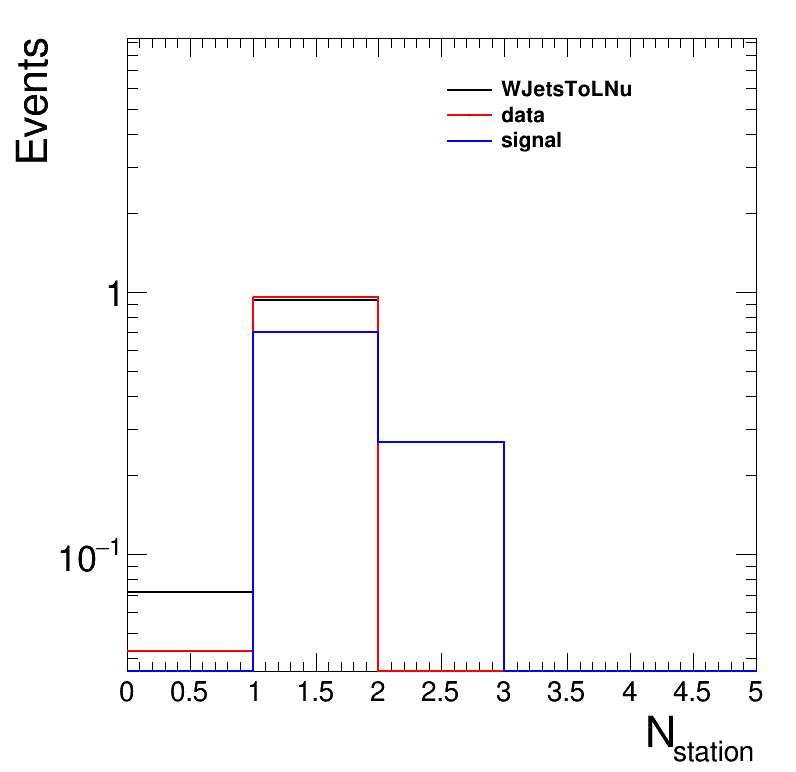

In [97]:
import importlib
importlib.reload(sys.modules['histo_utilities'])
from histo_utilities import create_TH1D, create_TH2D, std_color_list, create_TGraph, make_ratio_plot

# Plotting ncsc
start_t = time.time()



rt.gStyle.SetOptFit(1011)
var = [cscSegClusterX, cscSegClusterY, cscSegClusterZ, cscSegClusterXSpread, cscSegClusterYSpread, cscSegClusterZSpread, cscSegClusterEtaPhiSpread, cscSegClusterNStation]
title = ['cluster X [cm]', 'cluster Y [cm]', 'cluster Z [cm]', 'cluster X spread [cm]', 'cluster Y spread [cm]', 'cluster Z spread [cm]', 'cluster #eta-#phi spread', 'N_{station}']
bins = [[25,0,700],[25,0,700],[25,500,1100],[25,0,90], [25,0,90], [25,0,300], [25,0,0.1], [5,0,5]]
names = ['cscSegClusterX', 'cscSegClusterY', 'cscSegClusterZ', 'cscSegClusterXSpread', 'cscSegClusterYSpread', 'cscSegClusterZSpread', 'cscSegClusterEtaPhiSpread', 'cscSegClusterNStation']


for j,v in enumerate(var):
#     if not j == 7:continue
    leg = rt.TLegend(0.55,0.80,0.87,0.90)

    leg.SetTextSize(0.03)
    leg.SetBorderSize(0)
    leg.SetEntrySeparation(0.01)
    c = rt.TCanvas('c','c', 800, 800)

    h = {}
    for i,k in enumerate(['WJetsToLNu', 'data','signal']):
        h[k] = create_TH1D( np.abs(v[k]), axis_title=[title[j], 'Events'], name=k, binning=bins[j], weights = pileupWeight[k]* weight[k])
#         h[k] = create_TH1D( cscSegClusterYSpread[k], axis_title=['cluster Y spread [cm]', 'Events'], name=k, binning=[25,0,90], weights = pileupWeight[k]* weight[k])
    #     h[k] = create_TH1D( cscSegClusterZSpread[k], axis_title=['cluster Z spread [cm]', 'Events'], name=k, binning=[25,0,300], weights = pileupWeight[k]* weight[k])
    #     h[k] = create_TH1D( cscSegClusterEtaPhiSpread[k], axis_title=['cluster #eta-#phi spread', 'Events'], name=k, binning=[25,0,0.1], weights = pileupWeight[k]* weight[k])
    #     h[k] = create_TH1D( cscSegClusterNStation[k], axis_title=['N_{station}', 'Events'], name=k, binning=[5,0,5], weights = pileupWeight[k]* weight[k])
        h[k].SetLineColor(std_color_list[i])
        leg.AddEntry(h[k],k)

    #     leg.AddEntry(h[str(i)], "N_{rechits} in (%(first)d,%(second)d]"%{"first":previous_cut,"second":cut})

    #     print(k,"events after 200: ",np.sum(weight[k][nCsc_JetMuonVetoCluster0p4_Me1112Veto[k]>=0])*br)
        h[k].SetMaximum(h[k].GetMaximum()*10)
    #     h[str(i)].SetMinimum(0.1)



    #     r = h[k].Fit('expo', 'LRSQ+', '', 50,400)
    #     print(r.Get())
    #     print(r.Prob())
    #     h[k].GetFunction("expo").SetLineColor(std_color_list[2])
    #     h[k].GetFunction("expo").SetLineWidth(2)
        h[k].GetXaxis().SetLabelSize(0.04)
        h[k].DrawNormalized('same hist')
    #     h[k].Draw('same')

    c.SetRightMargin(0.05)
    c.SetLogy()
    leg.Draw()

    c.Draw()
#     c.SaveAs("/storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/MCData_shape_comparison_oot_eta2p1_ME1112veto/"+names[j]+".png")
#     c.SaveAs("/storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/MCData_shape_comparison_oot/"+names[j]+".png")

# print(time.time()-start_t)

35154.0 58174.0
35.92 fb^{-1} (13 TeV)


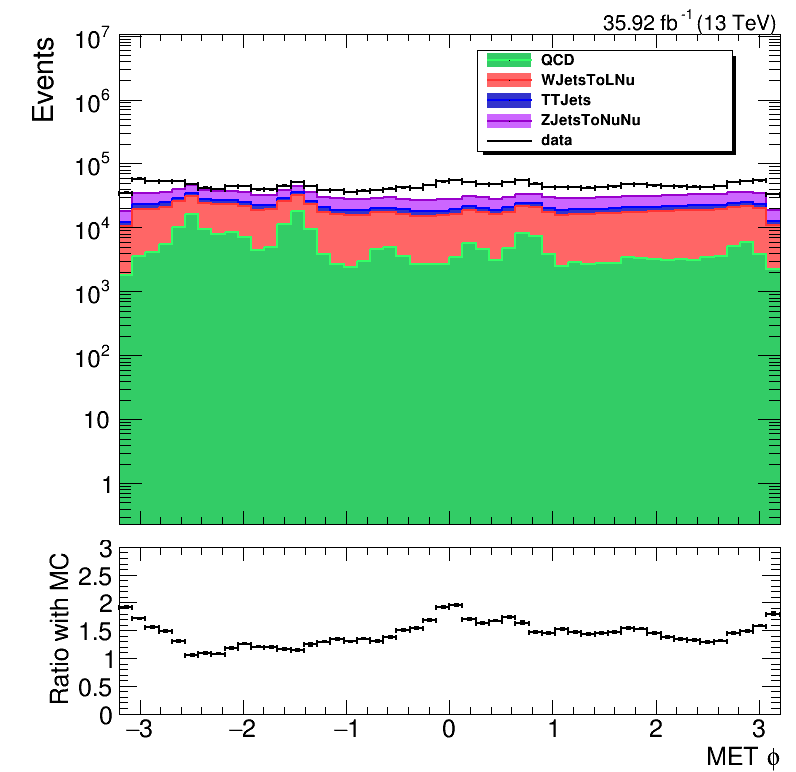

In [6]:
# Plotting THStack
lepid=13

color_list = [845,625,597,876,806,861,800,0,1,2]
# color_list = [806,861,]

    
var = [nJets, jetPt, jetPhi, jetEta, met, metPhi, jetMet_dPhiMin, HT]
xaxis = ['Number of jets', 'leading jet p_{T} [GeV]', 'leading jet #phi', 'leading jet #eta', 'MET [GeV]', 'MET #phi', 'min #Delta#phi(jet, MET)', 'HT [GeV]']
names = ['nJets', 'jetPt', 'jetPhi', 'jetEta', 'met', 'metPhi', 'jetMet_dPhiMin', 'HT']
bins = [[10,0,10], [50,0,5000], [50,-3.2,3.2], [50,-3,3], [25,0,2000], [50,-3.2,3.2],[50,0,3.2], [50,0,2000] ]
setlog = [1,1,1,1,1,1,1,1,1]

# cscSegClusterXSpread = {}
# cscSegClusterYSpread = {}
# cscSegClusterZSpread = {}
# cscSegClusterEtaPhiSpread = {}
# cscSegClusterNStation = {}



# bkg_keys = ['DYJetsToLL','TTJets_DiLept','QCD','TTJets_SingleLeptFromTbar','TTJets_SingleLeptFromT','WJetsToLNu','ZJetsToNuNu']
for var_i in range(len(var)):
# for var_i in [4]:

    if not var_i == 5: continue
    c = rt.TCanvas('c','c', 800, 800)
    h = {}
    leg = rt.TLegend(0.60,0.73,0.92,0.92)
    leg.SetTextSize(0.03)
#     leg.SetEntrySeparation(0.008)
    pad1 = rt.TPad("pad1", "pad1", 0, 0.3, 1, 0.99)
    pad1.SetBottomMargin(0.03)
    pad1.SetLeftMargin(0.15)
    # pad1.SetGridx()
    if setlog[var_i]:
        pad1.SetLogy()
    pad1.Draw()
    pad1.cd()

    stack = rt.THStack( "hs" , "Hgg Stack " )
    # var_i =2
    norm = 0
#     keys = ['QCD','WJetsToLNu']
#     keys = ['QCD','WJetsToLNu','TTJets']
    keys = ['QCD','WJetsToLNu','TTJets','ZJetsToNuNu']
#     keys = ['ZJetsToNuNu']

#     keys = ['QCD','WJetsToLNu','TTJets','ZJetsToNuNu_HT-100To200','ZJetsToNuNu_HT-200To400','ZJetsToNuNu_HT-400To600', 'ZJetsToNuNu_HT-600To800',
#             'ZJetsToNuNu_HT-800To1200','ZJetsToNuNu_HT-1200To2500','ZJetsToNuNu_HT-2500ToInf', ]
    sig_keys = ['data']
#     ewtt_keys = ['TTJets_DiLept','TTJets_SingleLeptFromTbar','TTJets_SingleLeptFromT','DYJetsToLL']
    # keys = ['WJetsToLNu','WJetsToLNu_old']
   
    for i,k in enumerate(keys):
        v = var[var_i][k]
        v = v
        w =weight[k] +  v * 0.0

        w = (pileupWeight[k]* weight[k]) +  v * 0.0
        v = v.flatten()
        w = w.flatten()
        v = v[w<8000000]
        w = w[w<8000000]

        h[k] = create_TH1D( v, axis_title=[xaxis[var_i], 'Events'], name=k, binning=bins[var_i],weights = w)
        stack.Add( h[k])
        h[k].SetLineColor(color_list[i]+3)
        h[k].SetFillColor(color_list[i])
        leg.AddEntry(h[k],k)

    stack.Draw('hist')

    for k in sig_keys:
        v = var[var_i][k]
        v = v.flatten()
        h[k] = create_TH1D( v, axis_title=[xaxis[var_i], 'Events'], name=k, binning=bins[var_i],weights = weight[k].flatten())
        h[k].SetLineColor(std_color_list[0])
        h[k].Draw("E1 same")
        print(h[k].GetBinContent(1),h[k].GetBinContent(2))
        leg.AddEntry(h[k],legend[k])




    leg.Draw()
    stack.GetXaxis().SetTitle("")
    stack.GetXaxis().SetLabelSize(0)
    stack.GetYaxis().SetTitle("Events")
#     c.SetLeftMargin(0.2)
    stack.GetYaxis().SetTitleOffset(1)
    stack.GetYaxis().SetRangeUser(0, 1.5*stack.GetStack().Last().GetMaximum())
    if setlog[var_i]:
        stack.SetMinimum(1)
        stack.SetMaximum(100*stack.GetStack().Last().GetMaximum())
# #         stack.GetYaxis().SetRangeUser(1, 100*stack.GetStack().Last().GetMaximum())
        
    c.cd()
    pad2 = rt.TPad("pad2", "pad2", 0, 0, 1, 0.3)
    pad2.SetTopMargin(0.03)
    pad2.SetBottomMargin(0.25)
    pad2.SetLeftMargin(0.15)
    # pad2.SetGrid()
    pad2.Draw()
    pad2.cd()

    h_copy = h['data'].Clone()
    h_copy.Divide(stack.GetStack().Last())
    h_copy.GetYaxis().SetTitleOffset(0.4)
#     h.GetYaxis().SetRangeUser(ratio_bounds[0], ratio_bounds[1])
    h_copy.GetYaxis().SetTitleSize(0.12)
    h_copy.GetYaxis().SetLabelSize(0.12)
    h_copy.GetYaxis().SetNdivisions(506)
    h_copy.SetMaximum(3)
    h_copy.SetMinimum(0)



    h_copy.GetXaxis().SetTitleOffset(1)
    h_copy.GetXaxis().SetTitleSize(0.12)
    h_copy.GetXaxis().SetLabelSize(0.12)
    h_copy.GetXaxis().SetTickSize(0.07)
    h_copy.SetYTitle('Ratio with {}'.format('MC'))
    h_copy.SetTitle("")
#        h.SetStats(0)
    h_copy.DrawCopy('E1')
    pad2.Update()
    
    
    
    CMS_lumi.lumi_13TeV = str(round(lumi/1000,2))+" fb^{-1}"
    CMS_lumi.cmsText = ""
    CMS_lumi.relPosY = 0.05
    CMS_lumi.writeExtraText = False
    CMS_lumi.CMS_lumi(c,4,4)

#     if setlog[var_i]: 
#         stack.SetMaximum(max_value*100)
#         if var_i == 6:
#             stack.SetMaximum(max_value*1500)
#         c.SetLogy()
    c.Draw()
#     if tightid:
#         c.SaveAs("/storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/stackplot/"+names[var_i]+"_tightid_jetpt"+str(jetPt_cut)+".png")
#     else:
#         c.SaveAs("/storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/stackplot/"+names[var_i]+"_looseid_jetpt"+str(jetPt_cut)+".png")
